In [ ]:
import pandas as pd
import numpy as np



data = pd.read_csv("train.csv")

In [ ]:
data.sample(10)
data["chol"] = pd.to_numeric(data["chol"], errors="coerce")


In [ ]:
import numpy as np
import pandas as pd

chol = data["chol"]

segmentos = pd.DataFrame({
    "negativos": (chol < 0),
    "cero": (chol == 0),
    "muy_altos_300_400": (chol > 300) & (chol <= 400),
    "altisimos_400_plus": (chol > 400),
    "validos": (chol > 0) & (chol <= 300)
}).mean() * 100

segmentos


,0
negativos,2.185792
cero,18.442623
muy_altos_300_400,9.836066
altisimos_400_plus,1.639344
validos,67.213115


In [ ]:
mask = data.isin(["?"])
nueves = data.isin(["-9.0"])

edad = data[data["age"] == 0]
print(mask.sum()/731)

print(nueves.sum()/731)
print(nueves.sum()/731)

age         0.000000
sex         0.000000
cp          0.000000
trestbps    0.064295
chol        0.000000
fbs         0.079343
restecg     0.000000
thalach     0.060192
exang       0.060192
oldpeak     0.067031
slope       0.129959
ca          0.340629
thal        0.231190
label       0.000000
dtype: float64
age         0.000000
sex         0.000000
cp          0.000000
trestbps    0.000000
chol        0.000000
fbs         0.010944
restecg     0.000000
thalach     0.000000
exang       0.000000
oldpeak     0.000000
slope       0.207934
ca          0.314637
thal        0.287278
label       0.000000
dtype: float64
age         0.000000
sex         0.000000
cp          0.000000
trestbps    0.000000
chol        0.000000
fbs         0.010944
restecg     0.000000
thalach     0.000000
exang       0.000000
oldpeak     0.000000
slope       0.207934
ca          0.314637
thal        0.287278
label       0.000000
dtype: float64


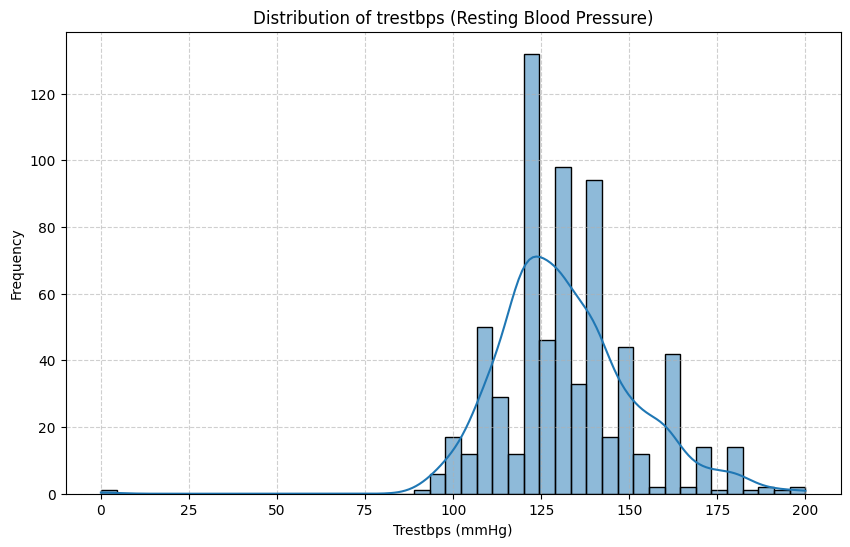

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Replace '?' with NaN in 'trestbps' column and convert to numeric
data['trestbps'] = data['trestbps'].replace('?', np.nan).astype(float)

# Create a distribution plot (histogram)
plt.figure(figsize=(10, 6))
sns.histplot(data['trestbps'].dropna(), kde=True)
plt.title('Distribution of trestbps (Resting Blood Pressure)')
plt.xlabel('Trestbps (mmHg)')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

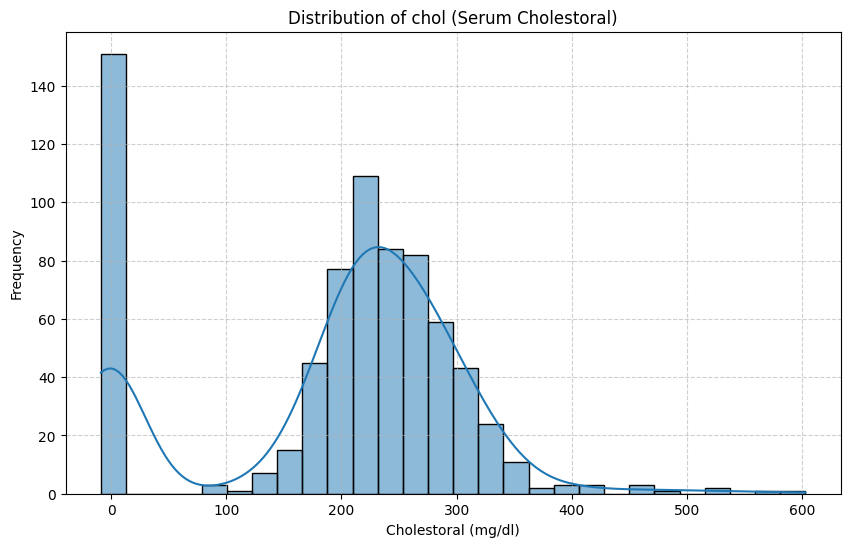

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Replace '?' with NaN in 'chol' column and convert to numeric
data['chol'] = data['chol'].replace('?', np.nan).astype(float)

# Create a distribution plot (histogram)
plt.figure(figsize=(10, 6))
sns.histplot(data['chol'].dropna(), kde=True)
plt.title('Distribution of chol (Serum Cholestoral)')
plt.xlabel('Cholestoral (mg/dl)')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# Task
Generate distribution plots for all columns in the `data` DataFrame after cleaning string representations of missing values ('?' and '-9.0') and converting the columns to numeric types. Summarize the process and highlight any initial observations from the visualizations.

## Prepare Data for Distribution Plots

### Subtask:
Iterate through all columns in the `data` DataFrame. For each column, identify and replace string representations of missing values (like '?' and '-9.0') with `np.nan`. Then, attempt to convert these columns to a numeric type (float) to prepare them for plotting.


**Reasoning**:
To prepare the data for distribution plots, I will iterate through all columns in the `data` DataFrame, replace string representations of missing values ('?' and '-9.0') with `np.nan`, and then convert each column to a numeric (float) data type using `pd.to_numeric` with `errors='coerce'` to handle any remaining non-numeric values gracefully.



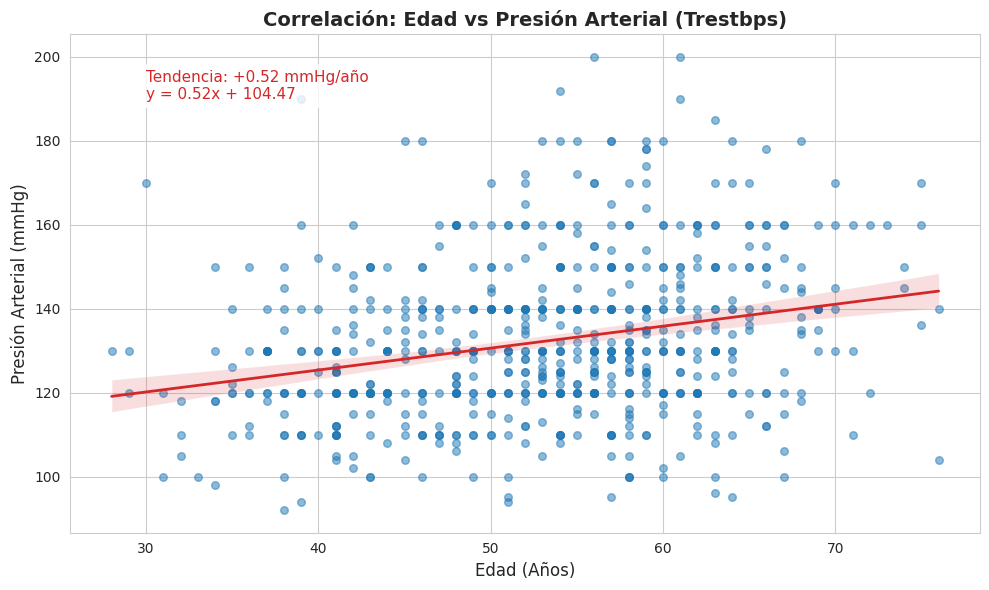

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Cargar y preparar datos (como solicitaste anteriormente)

# Limpieza específica para el gráfico (solo filas con Presión válida)
plot_data = data.copy()
plot_data['trestbps'] = pd.to_numeric(plot_data['trestbps'], errors='coerce')
plot_data = plot_data[plot_data['trestbps'] > 0]  # Eliminar 0s y NaNs

# Calcular la ecuación de la recta para mostrarla
slope, intercept = np.polyfit(plot_data['age'], plot_data['trestbps'], 1)

# Crear el gráfico
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

# Gráfico de dispersión con línea de regresión
sns.regplot(x='age', y='trestbps', data=plot_data,
            scatter_kws={'alpha': 0.5, 's': 30, 'color': '#1f77b4'},
            line_kws={'color': '#d62728', 'linewidth': 2})

# Etiquetas y Títulos
plt.title('Correlación: Edad vs Presión Arterial (Trestbps)', fontsize=14, fontweight='bold')
plt.xlabel('Edad (Años)', fontsize=12)
plt.ylabel('Presión Arterial (mmHg)', fontsize=12)

# Anotación con la fórmula
text_x = plot_data['age'].min() + 2
text_y = plot_data['trestbps'].max() - 10
plt.text(text_x, text_y, f'Tendencia: +{slope:.2f} mmHg/año\ny = {slope:.2f}x + {intercept:.2f}',
         fontsize=11, color='#d62728', bbox=dict(facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

**Reasoning**:
Now that the data has been cleaned and converted to numeric types, I will generate distribution plots (histograms) for all columns in the `data` DataFrame to visualize their distributions. I will use subplots to arrange them efficiently.



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get the list of columns to plot
columns_to_plot = data.columns

# Determine the number of rows and columns for subplots
num_columns = len(columns_to_plot)
num_rows = (num_columns + 2) // 3  # Aim for 3 columns per row

plt.figure(figsize=(18, num_rows * 5)) # Adjust figure size dynamically

for i, column in enumerate(columns_to_plot):
    plt.subplot(num_rows, 3, i + 1)
    sns.histplot(data[column].dropna(), kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

print("Distribution plots for all columns have been generated.")

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Asumimos que 'data' ya existe en el entorno global como indicaste.
# Creamos una copia para manipulación gráfica sin tocar el original
plot_data = data.copy()

# Crear una columna categórica binaria para el gráfico
# 0 = Sano, 1-4 = Enfermo
plot_data['Estado'] = plot_data['label'].apply(lambda x: 'Sano (Label 0)' if x == 0 else 'Enfermo (Label 1-4)')

# Configuración del estilo
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

# Crear el gráfico de densidad (KDE)
# fill=True rellena el área, common_norm=False normaliza cada grupo independientemente para comparar formas
sns.kdeplot(
    data=plot_data,
    x='age',
    hue='Estado',
    fill=True,
    common_norm=False,
    palette={'Sano (Label 0)': '#2ecc71', 'Enfermo (Label 1-4)': '#e74c3c'},
    alpha=0.5,
    linewidth=2
)

# Calcular las medias para dibujar líneas verticales
mean_sano = plot_data[plot_data['label'] == 0]['age'].mean()
mean_enfermo = plot_data[plot_data['label'] > 0]['age'].mean()

# Añadir líneas verticales de promedio
plt.axvline(mean_sano, color='#2ecc71', linestyle='--', label=f'Media Sanos: {mean_sano:.1f} años')
plt.axvline(mean_enfermo, color='#e74c3c', linestyle='--', label=f'Media Enfermos: {mean_enfermo:.1f} años')

# Títulos y etiquetas
plt.title('Distribución de Edad: Pacientes Sanos vs Enfermos', fontsize=14, fontweight='bold')
plt.xlabel('Edad', fontsize=12)
plt.ylabel('Densidad', fontsize=12)
plt.legend()

plt.tight_layout()
plt.show()

Conversion de datos: 1) colesterol
debido al gran número de valores imposibles (superior a 200~) he consdierado utilizar un Knn imputer

In [ ]:
import numpy as np
import pandas as pd
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge

# 1. DEFINIR COLUMNAS
cols_to_use = ['age', 'trestbps', 'thalach', 'chol']

# 2. LIMPIEZA CRÍTICA (Directamente en 'data', no en una copia)
# Convertimos a numérico primero. 'errors=coerce' transforma los '?' en NaN automáticamente
for col in cols_to_use:
    data[col] = pd.to_numeric(data[col], errors='coerce')

# Reemplazar valores lógicos erróneos en colesterol
data['chol'] = data['chol'].replace({0: np.nan, -9: np.nan})


# 3. CONFIGURAR EL IMPUTER (MICE)
imputer = IterativeImputer(
    estimator=BayesianRidge(),
    max_iter=10,
    random_state=0,
    initial_strategy='median' # Usa mediana solo como punto de partida interno, luego ajusta
)

# 4. APLICAR IMPUTER
# Ahora 'data' ya no tiene '?' ni strings, así que no dará error
print("Iniciando imputación...")
data_imputed_array = imputer.fit_transform(data[cols_to_use])

# 5. GUARDAR RESULTADOS
data_imputed = pd.DataFrame(data_imputed_array, columns=cols_to_use)
data['chol'] = data_imputed['chol']

cholnuevo = data["chol"]

Resulta que un Knn imputer no es nada efectivo ya que crea un sesgo demasiado alto sobre 229 y la distrubición es super imprecisa y no realista

In [ ]:
segmentos = pd.DataFrame({
    "negativos": (cholnuevo < 0),
    "cero": (cholnuevo == 0),
    "muy_altos_300_400": (cholnuevo > 300) & (cholnuevo <= 400),
    "altisimos_400_plus": (cholnuevo > 400),
    "validos": (cholnuevo > 0) & (cholnuevo <= 300)
}).mean() * 100

cholnuevo.sample(1)

veamos la nueva distribución

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(cholnuevo.dropna(), kde=True)
plt.title('Distribution of chol (Serum Cholestoral)')
plt.xlabel('Cholestoral (mg/dl)')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [ ]:
#ahora con oldpeak




import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

data["slope"] = data["slope"].replace("1.0","1")
data["slope"] = data["slope"].replace("2.0","2")
data["slope"] = data["slope"].replace("3.0","3")
data["slope"] = data["slope"].replace("-9.0",np.nan)
data["slope"] = data["slope"].replace("?",np.nan)

caca = data["slope"].isin([np.nan])
print(caca.sum())


import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargamos el dataset LIMPIO (el que usaremos de "maestro")
df_clean = pd.read_csv('train_limpio.csv')

# Mapeo nombres para trabajar cómodo
df_clean = df_clean.rename(columns={'oldpeak': 'oldpeak', 'slope': 'slope', 'heart-disease': 'label'})

# 1. ¿Cómo se comporta Slope cuando Oldpeak es 0?
slope_at_zero = df_clean[df_clean['oldpeak'] == 0]['slope'].value_counts(normalize=True)

# 2. ¿Cómo se comporta Slope cuando Oldpeak es alto (> 1.5)?
slope_at_high = df_clean[df_clean['oldpeak'] > 1.5]['slope'].value_counts(normalize=True)

print("--- REGLA MAESTRA DEL DATASET LIMPIO ---")
print("Si Oldpeak es 0 (Sin depresión):")
print(slope_at_zero)
print("\nSi Oldpeak es > 1.5 (Depresión fuerte):")
print(slope_at_high)

# Visualización para tu tranquilidad
plt.figure(figsize=(8, 5))
sns.boxplot(x='slope', y='oldpeak', data=df_clean)
plt.title('Relación Física: Oldpeak determina el Slope')
plt.show()

In [ ]:
data.describe()
data_clean = pd.read_csv("train_limpio.csv")

In [ ]:
import pandas as pd
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor

df_dirty = data.copy()
df_clean = data_clean.copy()

# 1. Igualar el nombre de las columnas en ambos
col_map = {
    'chest-pain': 'cp', 'rest-bp': 'trestbps', 'serum-chol': 'chol',
    'fasting-blood-sugar': 'fbs', 'electrocardiographic': 'restecg',
    'max-heart-rate': 'thalach', 'angina': 'exang', 'major-vessels': 'ca',
    'heart-disease': 'label'
}
df_clean = df_clean.rename(columns=col_map)
df_clean = df_clean[df_dirty.columns]

def extract_feats(df, is_dirty=True):
    d = df.copy()
    # Y: Target Paciente Crítico
    d['target_intensive_care'] = d['label'].apply(lambda x: 1 if x >= 3 else 0)

    if is_dirty:
        # Helper para chequear si es dato perdido (?, NaN, -9)
        def is_miss(val):
            s = str(val).strip()
            return s in ['?', 'nan', 'NaN', '-9.0', '-9'] or pd.isna(val)

        # X: Incapacidad física (Falta esfuerzo pero hay avanzado)
        d['flag_incap_fisica'] = d.apply(lambda r: 1 if is_miss(r['thalach']) and not is_miss(r['ca']) else 0, axis=1)

        # X: Calidad dato técnico (Ceros imposibles en chol/presión)
        # Forzamos a float seguro para comparar con 0
        def is_zero(val):
            try: return float(val) == 0
            except: return False

        d['flag_bad_chol_bp'] = d.apply(lambda r: 1 if (is_zero(r['chol']) or is_zero(r['trestbps'])) else 0, axis=1)

        # X: Conteo de huecos para detectar Filas con demasiados valores nulos (los zombiess)
        cols = ['trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']
        d['n_missing'] = d.apply(lambda r: sum(1 for c in cols if is_miss(r[c]) or (c in ['chol','trestbps'] and is_zero(r[c]))), axis=1)
    else:
        d['flag_incap_fisica'] = 0
        d['flag_bad_chol_bp'] = 0
        d['n_missing'] = 0
    return d
# lo dea rriba no sabia hacerlo le he pedido a chatgpt el codigo directaemnte
df_dirty = extract_feats(df_dirty, is_dirty=True)
df_clean = extract_feats(df_clean, is_dirty=False)

# 3. Limpieza (Solo Dirty)
# Eliminar Zombies
df_dirty = df_dirty[df_dirty['n_missing'] < 7]

# Forzar conversión numérica (Esto arregla tu ValueError)
# Convierte '?' a NaN y '2.5' a 2.5
cols_num = ['chol', 'trestbps', 'oldpeak', 'thalach', 'fbs', 'exang', 'ca', 'slope', 'thal']
for c in cols_num:
    df_dirty[c] = pd.to_numeric(df_dirty[c], errors='coerce')

# Correcciones lógicas
df_dirty['chol'] = df_dirty['chol'].replace(0, np.nan)
df_dirty['trestbps'] = df_dirty['trestbps'].replace(0, np.nan)
df_dirty['oldpeak'] = df_dirty['oldpeak'].abs()

# Tratamiento de -9.0 (Ahora que ya es numérico, buscamos el float -9.0)
# Categóricas -> -1
for c in ['ca', 'thal', 'slope']:
    df_dirty[c] = df_dirty[c].replace(-9.0, -1).fillna(-1) # fillna maneja también los que eran '?'

# Numéricas -> NaN (Para imputar)
for c in ['chol', 'trestbps', 'oldpeak', 'thalach', 'fbs', 'exang']:
    df_dirty[c] = df_dirty[c].replace(-9.0, np.nan)

# 4. Fusión
df_clean['source_trust'] = 1
df_dirty['source_trust'] = 0
df_final = pd.concat([df_clean, df_dirty], ignore_index=True)

# Deduplicación (Prioriza Limpio)
df_final = df_final.sort_values('source_trust', ascending=False)
df_final = df_final.drop_duplicates(subset=['age', 'sex', 'cp', 'trestbps', 'chol', 'thalach'], keep='first')

# 5. Imputación MICE
impute_cols = ['age', 'sex', 'cp', 'trestbps', 'chol', 'thalach', 'oldpeak', 'slope', 'label']
mice = IterativeImputer(estimator=RandomForestRegressor(n_jobs=-1, random_state=42), max_iter=10)

imputed = mice.fit_transform(df_final[impute_cols])
df_final[impute_cols] = pd.DataFrame(imputed, columns=impute_cols, index=df_final.index)

# Rounding final
df_final['slope'] = df_final['slope'].round().clip(1, 3)

print("Pipeline ejecutado correctamente.")
print(f"Filas finales: {len(df_final)}")
print(df_final[['age', 'slope', 'oldpeak', 'flag_incap_fisica']].head())

Pipeline ejecutado correctamente.
Filas finales: 882
      age  slope  oldpeak  flag_incap_fisica
734  63.0    1.0      3.7                  0
733  57.0    2.0      2.0                  0
732  60.0    1.0      2.0                  0
731  56.0    1.0      0.0                  0
730  54.0    1.0      0.0                  0


In [ ]:
print(df_final.sample(10))

df_final.to_csv("train_limpio.csv")

       age  sex   cp  trestbps        chol  fbs  restecg  thalach  exang  \
271   52.0  0.0  3.0     125.0  272.000000  0.0      0.0    139.0    0.0   
429   63.0  1.0  4.0     100.0  256.640000  NaN      0.0    109.0    0.0   
715   55.0  1.0  2.0     140.0  225.470000  NaN      1.0    150.0    0.0   
408   36.0  1.0  3.0     150.0  160.000000  0.0      0.0    172.0    0.0   
1098  64.0  0.0  4.0      95.0  243.696752  NaN      0.0    145.0    0.0   
344   69.0  1.0  4.0     135.0  239.530000  0.0      0.0    130.0    0.0   
231   61.0  0.0  4.0     145.0  307.000000  0.0      2.0    146.0    1.0   
1284  76.0  1.0  3.0     104.0  248.208456  0.0      2.0    120.0    0.0   
105   44.0  0.0  3.0     108.0  141.000000  0.0      0.0    175.0    0.0   
223   47.0  1.0  3.0     138.0  257.000000  0.0      2.0    156.0    0.0   

      oldpeak  slope   ca  thal  label  target_intensive_care  \
271       0.0    1.0 -1.0  -1.0    0.0                      0   
429       0.9    2.0 -1.0  -1.0  

In [ ]:
import pandas as pd; import numpy as np; import xgboost as xgb
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score, recall_score, precision_score, roc_auc_score

class HeartModel:
    def __init__(self):
        self.cols_imp = ['age','sex','cp','trestbps','chol','thalach','oldpeak','slope','label']
        self.cats = ['sex','cp','fbs','restecg','exang','slope','thal','flag_incap_fisica','flag_bad_data','src']
        self.model = None

    def prep(self, df, dirty=True):
        d = df.copy()
        if dirty:
            ismiss = lambda v: str(v).strip() in ['?','nan','NaN','-9.0','-9'] or pd.isna(v)
            d['flag_incap_fisica'] = d.apply(lambda r: 1 if ismiss(r['thalach']) and not ismiss(r['ca']) else 0, axis=1)
            d['flag_bad_data'] = d.apply(lambda r: 1 if (r['chol']==0 or r['trestbps']==0) else 0, axis=1)
            cols_z = ['trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal']
            d['n_miss'] = d.apply(lambda r: sum(1 for c in cols_z if ismiss(r[c]) or (c in ['chol','trestbps'] and r[c]==0)), axis=1)
            d = d[d['n_miss'] < 7]
            for c in d.columns: d[c] = pd.to_numeric(d[c], errors='coerce')
            d['chol'] = d['chol'].replace(0, np.nan); d['trestbps'] = d['trestbps'].replace(0, np.nan)
            d['oldpeak'] = d['oldpeak'].abs()
            for c in ['ca','thal','slope']: d[c] = d[c].replace([-9.0,-9], -1).fillna(-1)
            for c in ['chol','trestbps','oldpeak','thalach','fbs','exang']: d[c] = d[c].replace([-9.0,-9], np.nan)
        else:
            d[['flag_incap_fisica','flag_bad_data','n_miss']] = 0
        return d

    def load(self, train_path, clean_path):
        df_d = pd.read_csv(train_path, na_values=['?','nan','NaN'])
        df_c = pd.read_csv(clean_path).rename(columns={
            'chest-pain':'cp','rest-bp':'trestbps','serum-chol':'chol','fasting-blood-sugar':'fbs',
            'electrocardiographic':'restecg','max-heart-rate':'thalach','angina':'exang',
            'major-vessels':'ca','heart-disease':'label'
        })[df_d.columns]
        df_d = self.prep(df_d, True); df_c = self.prep(df_c, False)
        df_c['src'] = 1; df_d['src'] = 0
        df = pd.concat([df_c, df_d], ignore_index=True).sort_values('src', ascending=False)
        df = df.drop_duplicates(subset=['age','sex','cp','trestbps','chol','thalach'], keep='first')
        df[self.cols_imp] = IterativeImputer(
            estimator=RandomForestRegressor(n_jobs=-1, random_state=42)
        ).fit_transform(df[self.cols_imp])
        df['slope'] = df['slope'].round().clip(1, 3)
        return df

    def train(self, df):
        y = (df['label'] > 0).astype(int)
        X = df.drop(columns=['label'], errors='ignore')
        for c in self.cats: X[c] = X[c].fillna(-1).astype(int).astype('category')
        kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
        res = {'f1':[], 'rec':[], 'prec':[], 'auc':[]}
        for tr, te in kf.split(X, y):
            m = xgb.XGBClassifier(n_estimators=200, max_depth=4, learning_rate=0.05,
                                  enable_categorical=True, eval_metric='logloss', random_state=42)
            m.fit(X.iloc[tr], y.iloc[tr])
            p, pp = m.predict(X.iloc[te]), m.predict_proba(X.iloc[te])[:,1]
            res['f1'].append(f1_score(y.iloc[te], p))
            res['rec'].append(recall_score(y.iloc[te], p))
            res['prec'].append(precision_score(y.iloc[te], p))
            res['auc'].append(roc_auc_score(y.iloc[te], pp))
        self.model = m
        return {k: np.mean(v) for k, v in res.items()}


hm = HeartModel()
df = hm.load("train.csv", "heart.csv")
r = hm.train(df)
print(r)




/usr/local/lib/python3.12/dist-packages/sklearn/impute/_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


{'f1': np.float64(0.9235287460287459), 'rec': np.float64(0.9361467889908257), 'prec': np.float64(0.9113894915153496), 'auc': np.float64(0.9381922820937788)}


{'f1': np.float64(0.6491821334671734), 'precision': np.float64(0.6599112243464884), 'recall': np.float64(0.6587313816127376), 'accuracy': np.float64(0.6587313816127376), 'auc': np.float64(0.869901238456779)}


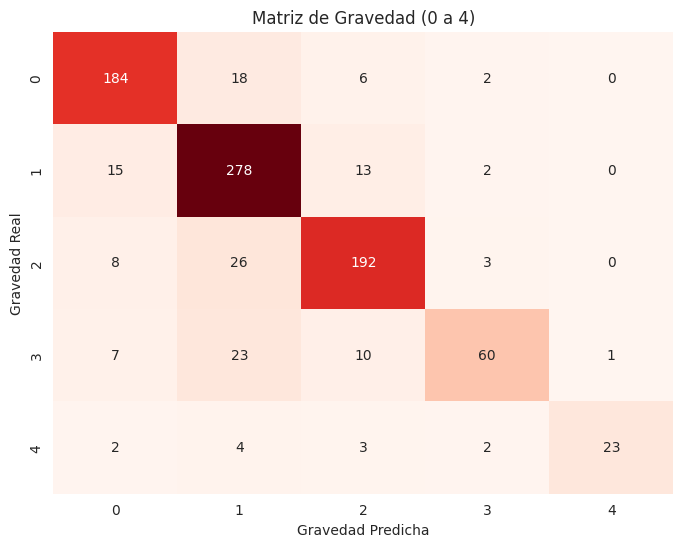

array([[184,  18,   6,   2,   0],
       [ 15, 278,  13,   2,   0],
       [  8,  26, 192,   3,   0],
       [  7,  23,  10,  60,   1],
       [  2,   4,   3,   2,  23]])

In [ ]:
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix, accuracy_score, roc_auc_score
import xgboost as xgb
from sklearn.model_selection import StratifiedKFold
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class MultiHeartClassifier:
    def __init__(self):
        self.cat_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal',
            'flag_incap_fisica', 'flag_bad_chol_bp', 'source_trust', 'flag_triage_only']
        self.model = xgb.XGBClassifier(
            objective='multi:softprob',
            num_class=5,
            n_estimators=200,
            max_depth=3,
            learning_rate=0.05,
            subsample=0.9,
            colsample_bytree=0.8,
            enable_categorical=True,
            eval_metric='mlogloss',
            random_state=42
        )

    def prepare(self, df):
        y = df['label'].fillna(0).astype(int)
        X = df.drop(columns=['label','target_intensive_care'], errors='ignore')
        for c in self.cat_cols:
            if c in X.columns:
                X[c] = X[c].fillna(-1).astype(int).astype('category')
        return X, y

    def train(self, df):
        X, y = self.prepare(df)
        kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=10)
        f1_s = []; prec_s = []; rec_s = []; acc_s = []; auc_s = []
        for tr, te in kf.split(X, y):
            Xtr, Xte = X.iloc[tr], X.iloc[te]
            ytr, yte = y.iloc[tr], y.iloc[te]
            self.model.fit(Xtr, ytr)
            p = self.model.predict(Xte)
            prob = self.model.predict_proba(Xte)
            f1_s.append(f1_score(yte, p, average='weighted'))
            prec_s.append(precision_score(yte, p, average='weighted', zero_division=0))
            rec_s.append(recall_score(yte, p, average='weighted'))
            acc_s.append(accuracy_score(yte, p))
            try:
                auc_s.append(roc_auc_score(yte, prob, multi_class='ovr', average='weighted'))
            except:
                pass
        return {
            'f1': np.mean(f1_s),
            'precision': np.mean(prec_s),
            'recall': np.mean(rec_s),
            'accuracy': np.mean(acc_s),
            'auc': np.mean(auc_s)
        }

    def confusion(self, df):
        X, y = self.prepare(df)
        preds = self.model.predict(X)
        cm = confusion_matrix(y, preds)
        plt.figure(figsize=(8,6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', cbar=False)
        plt.title('Matriz de Gravedad (0 a 4)')
        plt.ylabel('Gravedad Real')
        plt.xlabel('Gravedad Predicha')
        plt.show()
        return cm
clf = MultiHeartClassifier()
res = clf.train(df_final)
print(res)
clf.confusion(df_final)


In [ ]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.metrics import f1_score, accuracy_score
from sklearn.model_selection import StratifiedKFold
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor

class GravedadRegressor:
    def __init__(self):
       #Usamos Regressor para entender que 4 es mas grave que 3
        self.model = xgb.XGBRegressor(
            objective='reg:squarederror', # Minimizamos error numérico
            n_estimators=200,
            max_depth=4,
            learning_rate=0.15,
            subsample=0.85,
            colsample_bytree=0.85,
            enable_categorical=True,
            random_state=30,
            n_jobs=-1
        )
        self.train_cols = None

    def preparar(self, df, is_train=False):
        if 'label' in df.columns:
            y = df['label'].fillna(0).astype(int)
            X = df.drop(columns=['label','target_intensive_care'], errors='ignore')
        else:
            y = None
            X = df.drop(columns=['target_intensive_care'], errors='ignore')

        cat_cols = ['sex','cp','fbs','restecg','exang','slope','thal',
                    'flag_incap_fisica','flag_bad_chol_bp','source_trust','flag_triage_only']

        num_cols = [c for c in X.columns if c not in cat_cols]
        for c in num_cols:
            X[c] = pd.to_numeric(X[c], errors='coerce')

        if is_train:
            self.train_cols = X.columns.tolist()
        elif self.train_cols is not None:
            for col in self.train_cols:
                if col not in X.columns: X[col] = 0
            X = X[self.train_cols]

        for c in cat_cols:
            if c in X.columns:
                X[c] = pd.to_numeric(X[c], errors='coerce').fillna(-1).astype(int).astype('category')

        return X, y

    def entrenar_validar(self, X, y):
        self.train_cols = X.columns.tolist()
        kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
        f1s, accs = [], []

        for tr, te in kfold.split(X, y):
            Xtr, Xte = X.iloc[tr], X.iloc[te]
            ytr, yte = y.iloc[tr], y.iloc[te]

            self.model.fit(Xtr, ytr)

            raw_preds = self.model.predict(Xte)
            preds_rounded = np.round(raw_preds).clip(0, 4).astype(int)

            f1s.append(f1_score(yte, preds_rounded, average='weighted'))
            accs.append(accuracy_score(yte, preds_rounded))

        print(f"   F1 Score (Ponderado): {np.mean(f1s):.2%}")
        print(f"   Accuracy Global:      {np.mean(accs):.2%}")

        self.model.fit(X, y)

    def predecir(self, X):
        raw_preds = self.model.predict(X)
        return np.round(raw_preds).clip(0, 4).astype(int)

print(">>> Cargando datos...")
df_d = pd.read_csv('train.csv', na_values=['?','nan','NaN'])
try: df_c = pd.read_csv('data(2).csv')
except: df_c = pd.read_csv('heart.csv')
df_t = pd.read_csv('test.csv', na_values=['?','nan','NaN'])

col_map = {'chest-pain':'cp','rest-bp':'trestbps','serum-chol':'chol','fasting-blood-sugar':'fbs','electrocardiographic':'restecg','max-heart-rate':'thalach','angina':'exang','major-vessels':'ca','heart-disease':'label'}
df_c = df_c.rename(columns=col_map)[df_d.columns]

def prep(df, dirty=True, is_test=False):
    d = df.copy()
    if dirty:
        miss = lambda x: str(x).strip() in ['?','nan','NaN','-9.0','-9'] or pd.isna(x)
        d['flag_incap'] = d.apply(lambda r: 1 if miss(r['thalach']) and not miss(r['ca']) else 0, axis=1)
        d['flag_bad'] = d.apply(lambda r: 1 if (r['chol']==0 or r['trestbps']==0) else 0, axis=1)

        cols_z = ['trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal']
        d['n_miss'] = d.apply(lambda r: sum(1 for c in cols_z if miss(r[c]) or (c in ['chol','trestbps'] and r[c]==0)), axis=1)

        if not is_test: d = d[d['n_miss'] < 7]

        for c in d.columns:
            if c != 'id': d[c] = pd.to_numeric(d[c], errors='coerce')
        d['chol'] = d['chol'].replace(0, np.nan); d['trestbps'] = d['trestbps'].replace(0, np.nan); d['oldpeak'] = d['oldpeak'].abs()
        for c in ['ca','thal','slope']:
            if c in d.columns: d[c] = d[c].replace([-9.0,-9], -1).fillna(-1)
        for c in ['chol','trestbps','oldpeak','thalach','fbs','exang']:
            if c in d.columns: d[c] = d[c].replace([-9.0,-9], np.nan)
    else: d[['flag_incap','flag_bad','n_miss']] = 0
    return d

df_d = prep(df_d, True)
df_c = prep(df_c, False)
df_c['src'] = 1; df_d['src'] = 0

df = pd.concat([df_c, df_d], ignore_index=True).sort_values('src', ascending=False)
df = df.drop_duplicates(subset=['age','sex','cp','trestbps','chol','thalach'], keep='first')

print(">>> Imputando...")
imp_cols = ['age','sex','cp','trestbps','chol','thalach','oldpeak','slope']
mice = IterativeImputer(estimator=RandomForestRegressor(n_jobs=-1, random_state=42), max_iter=10)
df[imp_cols] = mice.fit_transform(df[imp_cols])
df['slope'] = df['slope'].round().clip(1, 3)

clf = GravedadRegressor()

X_train, y_train = clf.preparar(df, is_train=True)
clf.entrenar_validar(X_train, y_train)

df_t_proc = prep(df_t, True, is_test=True)
df_t_proc['src'] = 0
df_t_proc[imp_cols] = mice.transform(df_t_proc[imp_cols])
df_t_proc['slope'] = df_t_proc['slope'].round().clip(1, 3)

X_test, _ = clf.preparar(df_t_proc, is_train=False)
preds_final = clf.predecir(X_test)

submission = pd.DataFrame({
    'ID': range(0, len(df_t) ),
    'label': preds_final
})
#submission.to_csv('submission_regressor.csv', index=False)
print(f"Archivo 'submission_regressor.csv' generado. (Dimensiones: {submission.shape})")
print(submission.head())

>>> Cargando datos...
>>> Imputando...


/usr/local/lib/python3.12/dist-packages/sklearn/impute/_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


   F1 Score (Ponderado): 56.83%
   Accuracy Global:      57.82%
Archivo 'submission_regressor.csv' generado. (Dimensiones: (184, 2))
   ID  label
0   0      3
1   1      0
2   2      0
3   3      2
4   4      0


Modelo PYTORCH

In [ ]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor

# =============================================================================
# 1. CARGA Y PREPROCESAMIENTO FORENSE (Para que existan las flags)
# =============================================================================
print(">>> Cargando y Preparando Datos...")

df_d = pd.read_csv('train.csv', na_values=['?','nan','NaN'])
try: df_c = pd.read_csv('data(2).csv')
except: df_c = pd.read_csv('heart.csv')
df_t = pd.read_csv('test.csv', na_values=['?','nan','NaN'])

# Estandarizar nombres
col_map = {'chest-pain':'cp','rest-bp':'trestbps','serum-chol':'chol','fasting-blood-sugar':'fbs','electrocardiographic':'restecg','max-heart-rate':'thalach','angina':'exang','major-vessels':'ca','heart-disease':'label'}
df_c = df_c.rename(columns=col_map)[df_d.columns]

# Función de Ingeniería (CREA LAS FLAGS QUE FALTABAN)
def prep(df, dirty=True, is_test=False):
    d = df.copy()
    if dirty:
        miss = lambda x: str(x).strip() in ['?','nan','NaN','-9.0','-9'] or pd.isna(x)
        zero = lambda x: (x == 0)

        # --- AQUÍ SE CREAN LAS COLUMNAS ---
        d['flag_incap_fisica'] = d.apply(lambda r: 1 if miss(r['thalach']) and not miss(r['ca']) else 0, axis=1)
        d['flag_bad_chol_bp'] = d.apply(lambda r: 1 if (zero(r['chol']) or zero(r['trestbps'])) else 0, axis=1)

        cols_z = ['trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal']
        d['n_miss'] = d.apply(lambda r: sum(1 for c in cols_z if miss(r[c]) or (c in ['chol','trestbps'] and zero(r[c]))), axis=1)
        d['flag_triage_only'] = (d['n_miss'] >= 4).astype(int) # Nueva flag

        if not is_test: d = d[d['n_miss'] < 7] # Kill Zombies en train

        # Limpieza numérica
        for c in d.columns:
            if c != 'id': d[c] = pd.to_numeric(d[c], errors='coerce')
        d['chol'] = d['chol'].replace(0, np.nan)
        d['trestbps'] = d['trestbps'].replace(0, np.nan)
        d['oldpeak'] = d['oldpeak'].abs()

        # Protocolos
        for c in ['ca','thal','slope']: d[c] = d[c].replace([-9.0,-9], -1).fillna(-1)
        for c in ['chol','trestbps','oldpeak','thalach','fbs','exang']: d[c] = d[c].replace([-9.0,-9], np.nan)
    else:
        d[['flag_incap_fisica','flag_bad_chol_bp','flag_triage_only','n_miss']] = 0
    return d

# Procesar
df_d = prep(df_d, True)
df_c = prep(df_c, False)
df_t = prep(df_t, True, is_test=True)

df_c['source_trust'] = 1; df_d['source_trust'] = 0; df_t['source_trust'] = 0

# Fusión Train
df = pd.concat([df_c, df_d], ignore_index=True).sort_values('source_trust', ascending=False)
df = df.drop_duplicates(subset=['age','sex','cp','trestbps','chol','thalach'], keep='first')

# Imputación MICE (Necesaria antes de la Red)
print(">>> Imputando valores faltantes...")
imp_cols = ['age','sex','cp','trestbps','chol','thalach','oldpeak','slope']
mice = IterativeImputer(estimator=RandomForestRegressor(n_jobs=-1, random_state=42), max_iter=10)
df[imp_cols] = mice.fit_transform(df[imp_cols])
df['slope'] = df['slope'].round().clip(1, 3)

# Imputar Test con lo aprendido
df_t[imp_cols] = mice.transform(df_t[imp_cols])
df_t['slope'] = df_t['slope'].round().clip(1, 3)

# =============================================================================
# 2. PREPARACIÓN PYTORCH (Embeddings + Scaling)
# =============================================================================
# Unimos para codificar categóricas consistentemente
df['is_train'] = 1
df_t['is_train'] = 0
df_t['label'] = -1

full_data = pd.concat([df, df_t], ignore_index=True)

cat_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal',
            'flag_incap_fisica', 'flag_bad_chol_bp', 'source_trust', 'flag_triage_only']
cont_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# Rellenar cualquier NaN residual en categóricas para que LabelEncoder no falle
for c in cat_cols:
    full_data[c] = full_data[c].fillna(-1).astype(int).astype(str)

# A. Normalizar Continuas
scaler = StandardScaler()
full_data[cont_cols] = scaler.fit_transform(full_data[cont_cols])

# B. Codificar Categorías para Embeddings
cat_dims = []
for c in cat_cols:
    le = LabelEncoder()
    full_data[c] = le.fit_transform(full_data[c])
    cat_dims.append(len(le.classes_))

# Separar
X_train_full = full_data[full_data['is_train'] == 1]
X_test_full = full_data[full_data['is_train'] == 0]

X_cat = X_train_full[cat_cols].values.astype(np.int64)
X_cont = X_train_full[cont_cols].values.astype(np.float32)
y = X_train_full['label'].values.astype(np.int64)

X_test_cat = X_test_full[cat_cols].values.astype(np.int64)
X_test_cont = X_test_full[cont_cols].values.astype(np.float32)

# =============================================================================
# 3. MODELO Y DATASET
# =============================================================================
class TabularDataset(Dataset):
    def __init__(self, x_cat, x_cont, y=None):
        self.x_cat = x_cat
        self.x_cont = x_cont
        self.y = y
    def __len__(self): return len(self.x_cat)
    def __getitem__(self, idx):
        if self.y is not None:
            return self.x_cat[idx], self.x_cont[idx], self.y[idx]
        return self.x_cat[idx], self.x_cont[idx]

class HeartNN(nn.Module):
    def __init__(self, cat_dims, n_cont, n_classes=5):
        super().__init__()
        self.embeddings = nn.ModuleList([
            nn.Embedding(d, min(50, (d+1)//2)) for d in cat_dims
        ])
        self.n_emb = sum([min(50, (d+1)//2) for d in cat_dims])

        self.layers = nn.Sequential(
            nn.Linear(self.n_emb + n_cont, 256),
            nn.BatchNorm1d(256),
            nn.ReLU(),
            nn.Dropout(0.4),
            nn.Linear(256, 128),
            nn.BatchNorm1d(128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, n_classes)
        )

    def forward(self, x_cat, x_cont):
        x = [emb(x_cat[:, i]) for i, emb in enumerate(self.embeddings)]
        x = torch.cat(x, 1)
        x = torch.cat([x, x_cont], 1)
        return self.layers(x)

# =============================================================================
# 4. ENTRENAMIENTO
# =============================================================================
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"\n>>> Entrenando en: {device}")

BATCH_SIZE = 64
EPOCHS = 100
LR = 0.001

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
test_probs_ensemble = []

for fold, (train_idx, val_idx) in enumerate(skf.split(X_cat, y)):
    train_ds = TabularDataset(X_cat[train_idx], X_cont[train_idx], y[train_idx])
    val_ds = TabularDataset(X_cat[val_idx], X_cont[val_idx], y[val_idx])

    train_dl = DataLoader(train_ds, batch_size=BATCH_SIZE, shuffle=True)
    val_dl = DataLoader(val_ds, batch_size=BATCH_SIZE*2)

    model = HeartNN(cat_dims, len(cont_cols)).to(device)
    optimizer = optim.AdamW(model.parameters(), lr=LR, weight_decay=1e-4)
    criterion = nn.CrossEntropyLoss()

    for epoch in range(EPOCHS):
        model.train()
        for xc, xn, y_batch in train_dl:
            xc, xn, y_batch = xc.to(device), xn.to(device), y_batch.to(device)
            optimizer.zero_grad()
            out = model(xc, xn)
            loss = criterion(out, y_batch)
            loss.backward()
            optimizer.step()

    # Eval
    model.eval()
    val_p, val_t = [], []
    with torch.no_grad():
        for xc, xn, y_batch in val_dl:
            xc, xn = xc.to(device), xn.to(device)
            out = model(xc, xn)
            val_p.extend(torch.argmax(out, 1).cpu().numpy())
            val_t.extend(y_batch.numpy())

    print(f"   Fold {fold+1} F1-Score: {f1_score(val_t, val_p, average='weighted'):.2%}")

    # Predict Test
    test_ds = TabularDataset(X_test_cat, X_test_cont, None)
    test_dl = DataLoader(test_ds, batch_size=BATCH_SIZE*2)
    fold_probs = []
    with torch.no_grad():
        for xc, xn in test_dl:
            xc, xn = xc.to(device), xn.to(device)
            fold_probs.extend(torch.softmax(model(xc, xn), 1).cpu().numpy())
    test_probs_ensemble.append(fold_probs)

# =============================================================================
# 5. SUBMISSION
# =============================================================================
avg_probs = np.mean(test_probs_ensemble, axis=0)
final_preds = np.argmax(avg_probs, axis=1)

# Asegurar IDs correctos (1 a 184)
ids = range(0, len(final_preds) )

submission = pd.DataFrame({'ID': ids, 'label': final_preds})
submission.to_csv('submission_pytorch.csv', index=False)
print(f"\n>>> Archivo 'submission_pytorch.csv' generado. Dimensiones: {submission.shape}")

>>> Cargando y Preparando Datos...
>>> Imputando valores faltantes...


/usr/local/lib/python3.12/dist-packages/sklearn/impute/_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(



>>> Entrenando en: cpu
   Fold 1 F1-Score: 63.28%
   Fold 2 F1-Score: 57.34%
   Fold 3 F1-Score: 56.48%
   Fold 4 F1-Score: 57.48%
   Fold 5 F1-Score: 54.21%

>>> Archivo 'submission_pytorch.csv' generado. Dimensiones: (184, 2)


In [ ]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.metrics import f1_score, accuracy_score
from sklearn.model_selection import StratifiedKFold
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor

class GravedadRegressor:
    def __init__(self):
        # CAMBIO CLAVE: Usamos Regressor para entender que 4 es mas grave que 3
        self.model = xgb.XGBRegressor(
            objective='reg:squarederror', # Minimizamos error numérico
            n_estimators=300,
            max_depth=4,
            learning_rate=0.02,
            subsample=0.7,
            colsample_bytree=0.6,
            enable_categorical=True,
            random_state=42,
            n_jobs=-1
        )
        self.train_cols = None

    def preparar(self, df, is_train=False):
        if 'label' in df.columns:
            y = df['label'].fillna(0).astype(int)
            X = df.drop(columns=['label','target_intensive_care'], errors='ignore')
        else:
            y = None
            X = df.drop(columns=['target_intensive_care'], errors='ignore')

        cat_cols = ['sex','cp','fbs','restecg','exang','slope','thal',
                    'flag_incapacidad_fisica','flag_bad_chol_bp','source_trust','flag_triage_only']

        num_cols = [c for c in X.columns if c not in cat_cols]
        for c in num_cols:
            X[c] = pd.to_numeric(X[c], errors='coerce')

        if is_train:
            self.train_cols = X.columns.tolist()
        elif self.train_cols is not None:
            for col in self.train_cols:
                if col not in X.columns: X[col] = 0
            X = X[self.train_cols]

        for c in cat_cols:
            if c in X.columns:
                X[c] = pd.to_numeric(X[c], errors='coerce').fillna(-1).astype(int).astype('category')

        return X, y

    def entrenar_validar(self, X, y):
        self.train_cols = X.columns.tolist()
        kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
        f1s, accs = [], []

        print(">>> Entrenando Regresor con Validación Cruzada...")
        for tr, te in kfold.split(X, y):
            Xtr, Xte = X.iloc[tr], X.iloc[te]
            ytr, yte = y.iloc[tr], y.iloc[te]

            self.model.fit(Xtr, ytr)

            raw_preds = self.model.predict(Xte)
            preds_rounded = np.round(raw_preds).clip(0, 4).astype(int)

            f1s.append(f1_score(yte, preds_rounded, average='weighted'))
            accs.append(accuracy_score(yte, preds_rounded))

        print(f"   F1 Score (Ponderado): {np.mean(f1s):.2%}")
        print(f"   Accuracy Global:      {np.mean(accs):.2%}")

        self.model.fit(X, y)

    def predecir(self, X):
        raw_preds = self.model.predict(X)
        return np.round(raw_preds).clip(0, 4).astype(int)

print(">>> Cargando datos...")
df_d = pd.read_csv('train.csv', na_values=['?','nan','NaN'])
try: df_c = pd.read_csv('data(2).csv')
except: df_c = pd.read_csv('heart.csv')
df_t = pd.read_csv('test.csv', na_values=['?','nan','NaN'])

col_map = {'chest-pain':'cp','rest-bp':'trestbps','serum-chol':'chol','fasting-blood-sugar':'fbs','electrocardiographic':'restecg','max-heart-rate':'thalach','angina':'exang','major-vessels':'ca','heart-disease':'label'}
df_c = df_c.rename(columns=col_map)[df_d.columns]

def prep(df, dirty=True, is_test=False):
    d = df.copy()
    if dirty:
        miss = lambda x: str(x).strip() in ['?','nan','NaN','-9.0','-9'] or pd.isna(x)
        d['flag_incap'] = d.apply(lambda r: 1 if miss(r['thalach']) and not miss(r['ca']) else 0, axis=1)
        d['flag_bad'] = d.apply(lambda r: 1 if (r['chol']==0 or r['trestbps']==0) else 0, axis=1)

        cols_z = ['trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal']
        d['n_miss'] = d.apply(lambda r: sum(1 for c in cols_z if miss(r[c]) or (c in ['chol','trestbps'] and r[c]==0)), axis=1)

        if not is_test: d = d[d['n_miss'] < 7]

        for c in d.columns:
            if c != 'id': d[c] = pd.to_numeric(d[c], errors='coerce')
        d['chol'] = d['chol'].replace(0, np.nan); d['trestbps'] = d['trestbps'].replace(0, np.nan); d['oldpeak'] = d['oldpeak'].abs()
        for c in ['ca','thal','slope']:
            if c in d.columns: d[c] = d[c].replace([-9.0,-9], -1).fillna(-1)
        for c in ['chol','trestbps','oldpeak','thalach','fbs','exang']:
            if c in d.columns: d[c] = d[c].replace([-9.0,-9], np.nan)
    else: d[['flag_incap','flag_bad','n_miss']] = 0
    return d

df_d = prep(df_d, True)
df_c = prep(df_c, False)
df_c['src'] = 1; df_d['src'] = 0

df = pd.concat([df_c, df_d], ignore_index=True).sort_values('src', ascending=False)
df = df.drop_duplicates(subset=['age','sex','cp','trestbps','chol','thalach'], keep='first')

print(">>> Imputando...")
imp_cols = ['age','sex','cp','trestbps','chol','thalach','oldpeak','slope']
mice = IterativeImputer(estimator=RandomForestRegressor(n_jobs=-1, random_state=42), max_iter=10)
df[imp_cols] = mice.fit_transform(df[imp_cols])
df['slope'] = df['slope'].round().clip(1, 3)

clf = GravedadRegressor()

X_train, y_train = clf.preparar(df, is_train=True)
clf.entrenar_validar(X_train, y_train)

df_t_proc = prep(df_t, True, is_test=True)
df_t_proc['src'] = 0
df_t_proc[imp_cols] = mice.transform(df_t_proc[imp_cols])
df_t_proc['slope'] = df_t_proc['slope'].round().clip(1, 3)

X_test, _ = clf.preparar(df_t_proc, is_train=False)
preds_final = clf.predecir(X_test)

submission = pd.DataFrame({
    'ID': range(0, len(df_t)),
    'label': preds_final
})
submission.to_csv('submission_regressor.csv', index=False)
print(f"\n>>> Archivo 'submission_regressor.csv' generado. (Dimensiones: {submission.shape})")
print(submission.head())

>>> Cargando datos...
>>> Imputando...


/usr/local/lib/python3.12/dist-packages/sklearn/impute/_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


>>> Entrenando Regresor con Validación Cruzada...
   F1 Score (Ponderado): 58.07%
   Accuracy Global:      60.00%

>>> Archivo 'submission_regressor.csv' generado. (Dimensiones: (184, 2))
   ID  label
0   0      3
1   1      0
2   2      1
3   3      2
4   4      1


In [ ]:
import pandas as pd, numpy as np, xgboost as xgb
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# 1. CARGA
try: df_c = pd.read_csv('data(2).csv')
except: df_c = pd.read_csv('heart.csv')
df_d = pd.read_csv('train.csv', na_values=['?','nan','NaN'])
df_t = pd.read_csv('test.csv', na_values=['?','nan','NaN'])

# Estandarizar
cols = {'chest-pain':'cp','rest-bp':'trestbps','serum-chol':'chol','fasting-blood-sugar':'fbs',
        'electrocardiographic':'restecg','max-heart-rate':'thalach','angina':'exang',
        'major-vessels':'ca','heart-disease':'label'}
df_c = df_c.rename(columns=cols)[df_d.columns]

# 2. LIMPIEZA FORENSE
def clean(df, dirty=True, is_test=False):
    d = df.copy()
    if dirty:
        miss = lambda x: pd.isna(x) or str(x).strip() in ['?','-9.0','-9']
        d['flag_incap'] = d.apply(lambda r: 1 if miss(r['thalach']) and not miss(r['ca']) else 0, axis=1)
        d['flag_bad'] = d.apply(lambda r: 1 if r['chol']==0 or r['trestbps']==0 else 0, axis=1)

        for c in d.columns:
            if c != 'id': d[c] = pd.to_numeric(d[c], errors='coerce')
        d['chol'] = d['chol'].replace(0, np.nan); d['trestbps'] = d['trestbps'].replace(0, np.nan); d['oldpeak'] = d['oldpeak'].abs()
        d[['ca','thal','slope']] = d[['ca','thal','slope']].replace([-9.0,-9], -1).fillna(-1)
        d[['chol','trestbps','oldpeak','thalach','fbs','exang']] = d[['chol','trestbps','oldpeak','thalach','fbs','exang']].replace([-9.0,-9], np.nan)

        if not is_test:
            n_miss = d[['trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal']].isna().sum(axis=1)
            d = d[n_miss < 7]
    else: d[['flag_incap','flag_bad']] = 0
    return d

df_d = clean(df_d, True); df_c = clean(df_c, False); df_t = clean(df_t, True, True)
df_c['src'] = 1; df_d['src'] = 0; df_t['src'] = 0

# 3. FUSIÓN E IMPUTACIÓN
df = pd.concat([df_c, df_d], ignore_index=True).sort_values('src', ascending=False)
df = df.drop_duplicates(subset=['age','sex','cp','trestbps','chol','thalach'], keep='first')

imp = ['age','sex','cp','trestbps','chol','thalach','oldpeak','slope']
mice = IterativeImputer(estimator=RandomForestRegressor(n_jobs=-1, random_state=42))
df[imp] = mice.fit_transform(df[imp])
df_t[imp] = mice.transform(df_t[imp])
df['slope'] = df['slope'].round().clip(1,3); df_t['slope'] = df_t['slope'].round().clip(1,3)

# 4. ENTRENAMIENTO CON EPOCHS (EARLY STOPPING)
y = df['label'].astype(int)
X = df.drop(columns=['label', 'target_intensive_care'], errors='ignore')
Xt = df_t[X.columns]

cats = ['sex','cp','fbs','restecg','exang','slope','thal','flag_incap','flag_bad','src']
for c in cats:
    X[c] = X[c].fillna(-1).astype(int).astype('category')
    Xt[c] = Xt[c].fillna(-1).astype(int).astype('category')

# Separamos un trozo para validar las epochs
X_tr, X_val, y_tr, y_val = train_test_split(X, y, test_size=0.1, stratify=y, random_state=42)

print(f"Entrenando con {len(X_tr)} filas + {len(X_val)} validación...")

model = xgb.XGBClassifier(
    objective='multi:softprob',
    num_class=5,
    n_estimators=1000, # Ponemos muchas epochs
    max_depth=3,
    learning_rate=0.03, # Aprendizaje lento
    subsample=0.9,
    enable_categorical=True,
    random_state=42,
    early_stopping_rounds=50 # Si no mejora en 50 epochs, para
)

# Entrenamos mirando el set de validación
model.fit(X_tr, y_tr, eval_set=[(X_val, y_val)], verbose=50)

print(f"Mejor epoch: {model.best_iteration}")

# 5. EXPORTAR (IDs de 0 a len)
preds = model.predict(Xt)
sub = pd.DataFrame({'ID': range(0, len(preds)), 'label': preds.astype(int)}) # ID empieza en 0
sub.to_csv('submission.csv', index=False)
print(f"Hecho. Generado submission.csv con {len(sub)} filas (IDs 0-{len(sub)-1}).")
print(sub.head())

In [ ]:
import pandas as pd, numpy as np
import torch, torch.nn as nn, torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
import copy

# ==============================================================================
# 1. PREPARACIÓN FORENSE (IGUAL QUE ANTES)
# ==============================================================================
try: df_c = pd.read_csv('data(2).csv')
except: df_c = pd.read_csv('heart.csv')
df_d = pd.read_csv('train.csv', na_values=['?','nan','NaN'])
df_t = pd.read_csv('test.csv', na_values=['?','nan','NaN'])

cols = {'chest-pain':'cp','rest-bp':'trestbps','serum-chol':'chol','fasting-blood-sugar':'fbs',
        'electrocardiographic':'restecg','max-heart-rate':'thalach','angina':'exang',
        'major-vessels':'ca','heart-disease':'label'}
df_c = df_c.rename(columns=cols)[df_d.columns]

def clean(df, dirty=True, is_test=False):
    d = df.copy()
    if dirty:
        miss = lambda x: pd.isna(x) or str(x).strip() in ['?','-9.0','-9']
        d['flag_incap'] = d.apply(lambda r: 1 if miss(r['thalach']) and not miss(r['ca']) else 0, axis=1)
        d['flag_bad'] = d.apply(lambda r: 1 if r['chol']==0 or r['trestbps']==0 else 0, axis=1)

        for c in d.columns:
            if c != 'id': d[c] = pd.to_numeric(d[c], errors='coerce')
        d['chol'] = d['chol'].replace(0, np.nan); d['trestbps'] = d['trestbps'].replace(0, np.nan); d['oldpeak'] = d['oldpeak'].abs()
        d[['ca','thal','slope']] = d[['ca','thal','slope']].replace([-9.0,-9], -1).fillna(-1)
        d[['chol','trestbps','oldpeak','thalach','fbs','exang']] = d[['chol','trestbps','oldpeak','thalach','fbs','exang']].replace([-9.0,-9], np.nan)

        if not is_test:
            n_miss = d[['trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal']].isna().sum(axis=1)
            d = d[n_miss < 7]
    else: d[['flag_incap','flag_bad']] = 0
    return d

df_d = clean(df_d, True); df_c = clean(df_c, False); df_t = clean(df_t, True, True)
df_c['src'] = 1; df_d['src'] = 0; df_t['src'] = 0

df = pd.concat([df_c, df_d], ignore_index=True).sort_values('src', ascending=False)
df = df.drop_duplicates(subset=['age','sex','cp','trestbps','chol','thalach'], keep='first')

imp = ['age','sex','cp','trestbps','chol','thalach','oldpeak','slope']
mice = IterativeImputer(estimator=RandomForestRegressor(n_jobs=-1, random_state=42))
df[imp] = mice.fit_transform(df[imp])
df_t[imp] = mice.transform(df_t[imp])
df['slope'] = df['slope'].round().clip(1,3); df_t['slope'] = df_t['slope'].round().clip(1,3)

# ==============================================================================
# 2. PREPARACIÓN PARA RED NEURONAL
# ==============================================================================
df['is_train'] = 1; df_t['is_train'] = 0; df_t['label'] = -1
full = pd.concat([df, df_t], ignore_index=True)

cats = ['sex','cp','fbs','restecg','exang','slope','thal','flag_incap','flag_bad','src']
conts = ['age','trestbps','chol','thalach','oldpeak']

# Normalizar continuas
scaler = StandardScaler()
full[conts] = scaler.fit_transform(full[conts])

# Codificar categorías para Embeddings
cat_dims = []
for c in cats:
    le = LabelEncoder()
    full[c] = le.fit_transform(full[c].fillna(-1).astype(int).astype(str))
    cat_dims.append(len(le.classes_))

# Separar y convertir a Tensores
train = full[full['is_train']==1]
test = full[full['is_train']==0]

X_cat = torch.tensor(train[cats].values, dtype=torch.long)
X_cont = torch.tensor(train[conts].values, dtype=torch.float32)
y = torch.tensor(train['label'].values, dtype=torch.long)

Xt_cat = torch.tensor(test[cats].values, dtype=torch.long)
Xt_cont = torch.tensor(test[conts].values, dtype=torch.float32)

# ==============================================================================
# 3. MODELO PYTORCH
# ==============================================================================
class TabularDataset(Dataset):
    def __init__(self, x_cat, x_cont, y=None):
        self.xc, self.xn, self.y = x_cat, x_cont, y
    def __len__(self): return len(self.xc)
    def __getitem__(self, i): return (self.xc[i], self.xn[i], self.y[i]) if self.y is not None else (self.xc[i], self.xn[i])

class NeuralNet(nn.Module):
    def __init__(self, emb_dims, n_cont, n_out):
        super().__init__()
        self.embs = nn.ModuleList([nn.Embedding(x, min(50, (x+1)//2)) for x in emb_dims])
        n_emb = sum([e.embedding_dim for e in self.embs])
        self.layers = nn.Sequential(
            nn.Linear(n_emb + n_cont, 256), nn.BatchNorm1d(256), nn.ReLU(), nn.Dropout(0.4),
            nn.Linear(256, 128), nn.BatchNorm1d(128), nn.ReLU(), nn.Dropout(0.3),
            nn.Linear(128, n_out)
        )
    def forward(self, xc, xn):
        x = [e(xc[:,i]) for i,e in enumerate(self.embs)]
        x = torch.cat(x, 1)
        x = torch.cat([x, xn], 1)
        return self.layers(x)

# ==============================================================================
# 4. ENTRENAMIENTO CON EPOCHS & EARLY STOPPING
# ==============================================================================
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Entrenando en {device}...")

# Split Validación
idx = np.arange(len(X_cat))
train_idx, val_idx = train_test_split(idx, test_size=0.15, stratify=y, random_state=42)

train_ds = TabularDataset(X_cat[train_idx], X_cont[train_idx], y[train_idx])
val_ds = TabularDataset(X_cat[val_idx], X_cont[val_idx], y[val_idx])
train_dl = DataLoader(train_ds, batch_size=32, shuffle=True)
val_dl = DataLoader(val_ds, batch_size=128)

model = NeuralNet(cat_dims, len(conts), 5).to(device)
crit = nn.CrossEntropyLoss()
opt = optim.AdamW(model.parameters(), lr=0.001, weight_decay=1e-4)

best_acc = 0
best_wts = copy.deepcopy(model.state_dict())
patience = 15
counter = 0

for epoch in range(150):
    model.train()
    for xc, xn, yb in train_dl:
        xc, xn, yb = xc.to(device), xn.to(device), yb.to(device)
        opt.zero_grad()
        loss = crit(model(xc, xn), yb)
        loss.backward()
        opt.step()

    model.eval()
    preds, targets = [], []
    with torch.no_grad():
        for xc, xn, yb in val_dl:
            xc, xn = xc.to(device), xn.to(device)
            out = model(xc, xn)
            preds.extend(torch.argmax(out, 1).cpu().numpy())
            targets.extend(yb.numpy())

    acc = f1_score(targets, preds, average='weighted')
    if acc > best_acc: #para guardar mejor puntiacion
        best_acc = acc
        best_wts = copy.deepcopy(model.state_dict())
        counter = 0
        print(f"Epoch {epoch}: Nuevo mejor F1: {acc:.2%}")
    else:
        counter += 1
        if counter >= patience:
            print("Early stopping.")
            break

# ==============================================================================
# 5. PREDICCIÓN Y SUBMISSION
# ==============================================================================
model.load_state_dict(best_wts)
test_ds = TabularDataset(Xt_cat, Xt_cont)
test_dl = DataLoader(test_ds, batch_size=128)

final_preds = []
model.eval()
with torch.no_grad():
    for xc, xn in test_dl:
        xc, xn = xc.to(device), xn.to(device)
        out = model(xc, xn)
        final_preds.extend(torch.argmax(out, 1).cpu().numpy())

sub = pd.DataFrame({'ID': range(0, len(final_preds)), 'label': final_preds})
sub.to_csv('submission.csv', index=False)
print(f"Hecho. IDs de 0 a {len(sub)-1}.")
print(sub.head())

Resultado - 0.46195

Intento de hacer que el modelo mejore con cada ejecución

In [ ]:
import pandas as pd, numpy as np
import torch, torch.nn as nn, torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
import copy
import random
import os

def seed_everything(seed=42):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

seed_everything(42)

# ==============================================================================
# 1. PREPARACIÓN FORENSE
# ==============================================================================
try: df_c = pd.read_csv('data(2).csv')
except: df_c = pd.read_csv('heart.csv')
df_d = pd.read_csv('train.csv', na_values=['?','nan','NaN'])
df_t = pd.read_csv('test.csv', na_values=['?','nan','NaN'])

cols = {'chest-pain':'cp','rest-bp':'trestbps','serum-chol':'chol','fasting-blood-sugar':'fbs',
        'electrocardiographic':'restecg','max-heart-rate':'thalach','angina':'exang',
        'major-vessels':'ca','heart-disease':'label'}
df_c = df_c.rename(columns=cols)[df_d.columns]

def clean(df, dirty=True, is_test=False):
    d = df.copy()
    if dirty:
        miss = lambda x: pd.isna(x) or str(x).strip() in ['?','-9.0','-9']
        d['flag_incap'] = d.apply(lambda r: 1 if miss(r['thalach']) and not miss(r['ca']) else 0, axis=1)
        d['flag_bad'] = d.apply(lambda r: 1 if r['chol']==0 or r['trestbps']==0 else 0, axis=1)

        for c in d.columns:
            if c != 'id': d[c] = pd.to_numeric(d[c], errors='coerce')
        d['chol'] = d['chol'].replace(0, np.nan); d['trestbps'] = d['trestbps'].replace(0, np.nan); d['oldpeak'] = d['oldpeak'].abs()
        d[['ca','thal','slope']] = d[['ca','thal','slope']].replace([-9.0,-9], -1).fillna(-1)
        d[['chol','trestbps','oldpeak','thalach','fbs','exang']] = d[['chol','trestbps','oldpeak','thalach','fbs','exang']].replace([-9.0,-9], np.nan)

        if not is_test:
            n_miss = d[['trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal']].isna().sum(axis=1)
            d = d[n_miss < 7]
    else: d[['flag_incap','flag_bad']] = 0
    return d

df_d = clean(df_d, True); df_c = clean(df_c, False); df_t = clean(df_t, True, True)
df_c['src'] = 1; df_d['src'] = 0; df_t['src'] = 0

df = pd.concat([df_c, df_d], ignore_index=True).sort_values('src', ascending=False)
df = df.drop_duplicates(subset=['age','sex','cp','trestbps','chol','thalach'], keep='first')

imp = ['age','sex','cp','trestbps','chol','thalach','oldpeak','slope']
mice = IterativeImputer(estimator=RandomForestRegressor(n_jobs=-1, random_state=42))
df[imp] = mice.fit_transform(df[imp])
df_t[imp] = mice.transform(df_t[imp])
df['slope'] = df['slope'].round().clip(1,3); df_t['slope'] = df_t['slope'].round().clip(1,3)

# ==============================================================================
# 2. PREPARACIÓN RED NEURONAL
# ==============================================================================
df['is_train'] = 1; df_t['is_train'] = 0; df_t['label'] = -1
full = pd.concat([df, df_t], ignore_index=True)

cats = ['sex','cp','fbs','restecg','exang','slope','thal','flag_incap','flag_bad','src']
conts = ['age','trestbps','chol','thalach','oldpeak']

scaler = StandardScaler()
full[conts] = scaler.fit_transform(full[conts])

cat_dims = []
for c in cats:
    le = LabelEncoder()
    full[c] = le.fit_transform(full[c].fillna(-1).astype(int).astype(str))
    cat_dims.append(len(le.classes_))

# ==============================================================================
# 3. DEFINICIONES DE CLASES
# ==============================================================================
class TabularDataset(Dataset):
    def __init__(self, x_cat, x_cont, y=None):
        self.xc, self.xn, self.y = x_cat, x_cont, y
    def __len__(self): return len(self.xc)
    def __getitem__(self, i): return (self.xc[i], self.xn[i], self.y[i]) if self.y is not None else (self.xc[i], self.xn[i])

class NeuralNet(nn.Module):
    def __init__(self, emb_dims, n_cont, n_out):
        super().__init__()
        self.embs = nn.ModuleList([nn.Embedding(x, min(50, (x+1)//2)) for x in emb_dims])
        n_emb = sum([e.embedding_dim for e in self.embs])
        self.layers = nn.Sequential(
            nn.Linear(n_emb + n_cont, 256), nn.BatchNorm1d(256), nn.ReLU(), nn.Dropout(0.4),
            nn.Linear(256, 128), nn.BatchNorm1d(128), nn.ReLU(), nn.Dropout(0.3),
            nn.Linear(128, n_out)
        )
    def forward(self, xc, xn):
        x = [e(xc[:,i]) for i,e in enumerate(self.embs)]
        x = torch.cat(x, 1)
        x = torch.cat([x, xn], 1)
        return self.layers(x)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Función auxiliar para obtener tensores
def get_tensors(data_subset):
    Xc = torch.tensor(data_subset[cats].values, dtype=torch.long)
    Xn = torch.tensor(data_subset[conts].values, dtype=torch.float32)
    y = torch.tensor(data_subset['label'].values, dtype=torch.long)
    return Xc, Xn, y

# ==============================================================================
# 4. BUCLE DE AUTO-MEJORA (PSEUDO-LABELING)
# ==============================================================================
print(f"Entrenando en {device}...")

# Inicializamos con el Train Original
train_pool = full[full['is_train']==1].copy()
test_pool = full[full['is_train']==0].copy()

ROUNDS = 10 # Cuantas veces nos retroalimentamos
CONFIDENCE_THRESHOLD = 0.78 # parametro clave en el que el modelo decide ser más o menos conservador a la hora de hacer el pseudo labeling

final_model_wts = None

for round_num in range(ROUNDS):
    print(f"\n>>> RONDA {round_num + 1} (Tamaño Train: {len(train_pool)})")

    # Preparar datos
    X_cat, X_cont, y = get_tensors(train_pool)

    # Split Validación
    idx = np.arange(len(X_cat))
    # Stratify solo si hay suficientes clases, sino aleatorio
    try:
        tr_idx, val_idx = train_test_split(idx, test_size=0.15, stratify=y, random_state=42+round_num)
    except:
        tr_idx, val_idx = train_test_split(idx, test_size=0.15, random_state=42+round_num)

    train_ds = TabularDataset(X_cat[tr_idx], X_cont[tr_idx], y[tr_idx])
    val_ds = TabularDataset(X_cat[val_idx], X_cont[val_idx], y[val_idx])
    train_dl = DataLoader(train_ds, batch_size=32, shuffle=True)
    val_dl = DataLoader(val_ds, batch_size=128)

    # Reiniciar modelo cada ronda
    model = NeuralNet(cat_dims, len(conts), 5).to(device)
    crit = nn.CrossEntropyLoss()
    opt = optim.AdamW(model.parameters(), lr=0.001, weight_decay=1e-4)

    best_f1 = 0
    patience = 12
    counter = 0

    # Entrenamiento
    for epoch in range(100):
        model.train()
        for xc, xn, yb in train_dl:
            xc, xn, yb = xc.to(device), xn.to(device), yb.to(device)
            opt.zero_grad()
            loss = crit(model(xc, xn), yb)
            loss.backward()
            opt.step()

        model.eval()
        preds, targets = [], []
        with torch.no_grad():
            for xc, xn, yb in val_dl:
                xc, xn = xc.to(device), xn.to(device)
                out = model(xc, xn)
                preds.extend(torch.argmax(out, 1).cpu().numpy())
                targets.extend(yb.numpy())

        score = f1_score(targets, preds, average='weighted')
        if score > best_f1:
            best_f1 = score
            final_model_wts = copy.deepcopy(model.state_dict())
            counter = 0
        else:
            counter += 1
            if counter >= patience: break

    print(f"   Mejor F1 en validación: {best_f1:.2%}")

    # --- AUTO-FEEDBACK ---
    if round_num < ROUNDS - 1: # No hacerlo en la última ronda
        model.load_state_dict(final_model_wts)
        model.eval()

        # Predecir sobre el Test actual
        Xt_cat, Xt_cont, _ = get_tensors(test_pool)
        test_ds = TabularDataset(Xt_cat, Xt_cont)
        test_dl = DataLoader(test_ds, batch_size=128)

        all_probs = []
        with torch.no_grad():
            for xc, xn in test_dl:
                xc, xn = xc.to(device), xn.to(device)
                probs = torch.softmax(model(xc, xn), 1)
                all_probs.extend(probs.cpu().numpy())

        all_probs = np.array(all_probs)
        max_probs = np.max(all_probs, axis=1)
        preds = np.argmax(all_probs, axis=1)

        # Filtrar los que superan el umbral de confianza
        confident_indices = np.where(max_probs > CONFIDENCE_THRESHOLD)[0]

        if len(confident_indices) > 0:
            print(f"   -> Pseudo-Etiquetando {len(confident_indices)} muestras del Test al Train.")

            # Extraer las filas confiables del test
            new_data = test_pool.iloc[confident_indices].copy()
            new_data['label'] = preds[confident_indices] # Asignar la predicción como verdad

            # Añadir al pool de entrenamiento
            train_pool = pd.concat([train_pool, new_data], ignore_index=True)

            # Quitar del pool de test (para no duplicar o predecir lo que ya "sabemos")
            # Opcional: En este caso simple, mantenemos el test intacto para la submission final,
            # pero para el bucle de feedback no queremos re-etiquetar lo mismo.
            test_pool = test_pool.drop(test_pool.index[confident_indices])
        else:
            print("   -> Ninguna predicción superó el umbral de confianza. Parando feedback.")
            break

# ==============================================================================
# 5. SUBMISSION FINAL
# ==============================================================================
model.load_state_dict(final_model_wts)
model.eval()

# Predecimos sobre el Test original COMPLETO
Xt_cat = torch.tensor(full[full['is_train']==0][cats].values, dtype=torch.long)
Xt_cont = torch.tensor(full[full['is_train']==0][conts].values, dtype=torch.float32)

test_ds = TabularDataset(Xt_cat, Xt_cont)
test_dl = DataLoader(test_ds, batch_size=128)

final_preds = []
with torch.no_grad():
    for xc, xn in test_dl:
        xc, xn = xc.to(device), xn.to(device)
        out = model(xc, xn)
        final_preds.extend(torch.argmax(out, 1).cpu().numpy())

sub = pd.DataFrame({'ID': range(0, len(final_preds)), 'label': final_preds})
sub.to_csv('submission.csv', index=False)
print("ya")
print(sub.head())

Resultado - 0.51630 5 rondas confianza de 0.82


aumenatmos a 10 rondas y confianza de 0.86

Resultado - 0.47826

reducimos confianza a 0.8

Resultado - 0.52717

reducimos confianza un poco más, a 0.75
Resultado . 0.58152 -- nuevo record!

reducimos confianza una ultima vez a 0.70, más dará resultado contraproducente?
correcto  - 0.48

punto medio - 0.72 - 0.47826


0.75 - 0.53260
0.51086
------ aplicamos un seed_everything para que incluso la red neuronal siempre de el mismo valor (recordemos que ne la red se realiza un shuffle, para que sea mas precisa)

0.78 - 55434




viendo las caracterísitcas del shuffle, usaremos 5 semillas aleaatorias y nos quedamos con "lo mejor de cada semilla"

In [ ]:
import pandas as pd, numpy as np, copy, random, os
import torch, torch.nn as nn, torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

def seed_all(s):
    random.seed(s); os.environ['PYTHONHASHSEED']=str(s); np.random.seed(s)
    torch.manual_seed(s); torch.cuda.manual_seed(s)
    torch.backends.cudnn.deterministic=True; torch.backends.cudnn.benchmark=False

# 1. CARGA Y LIMPIEZA
try: df_c = pd.read_csv('data(2).csv')
except: df_c = pd.read_csv('heart.csv')
df_d = pd.read_csv('train.csv', na_values=['?','nan','NaN'])
df_t = pd.read_csv('test.csv', na_values=['?','nan','NaN'])

df_c = df_c.rename(columns={'chest-pain':'cp','rest-bp':'trestbps','serum-chol':'chol','fasting-blood-sugar':'fbs','electrocardiographic':'restecg','max-heart-rate':'thalach','angina':'exang','major-vessels':'ca','heart-disease':'label'})[df_d.columns]

def clean(df, dirty=True, is_test=False):
    d = df.copy()
    if dirty:
        miss = lambda x: pd.isna(x) or str(x).strip() in ['?','-9.0','-9']
        d['flag_incap'] = d.apply(lambda r: 1 if miss(r['thalach']) and not miss(r['ca']) else 0, axis=1)
        d['flag_bad'] = d.apply(lambda r: 1 if r['chol']==0 or r['trestbps']==0 else 0, axis=1)
        for c in d.columns:
            if c != 'id': d[c] = pd.to_numeric(d[c], errors='coerce')
        d['chol'] = d['chol'].replace(0, np.nan); d['trestbps'] = d['trestbps'].replace(0, np.nan); d['oldpeak'] = d['oldpeak'].abs()
        d[['ca','thal','slope']] = d[['ca','thal','slope']].replace([-9.0,-9], -1).fillna(-1)
        d[['chol','trestbps','oldpeak','thalach','fbs','exang']] = d[['chol','trestbps','oldpeak','thalach','fbs','exang']].replace([-9.0,-9], np.nan)
        if not is_test:
            n_miss = d[['trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal']].isna().sum(axis=1)
            d = d[n_miss < 7]
    else: d[['flag_incap','flag_bad']] = 0
    return d

df_d, df_c, df_t = clean(df_d, True), clean(df_c, False), clean(df_t, True, True)
df_c['src'], df_d['src'], df_t['src'] = 1, 0, 0

df = pd.concat([df_c, df_d], ignore_index=True).sort_values('src', ascending=False)
df = df.drop_duplicates(subset=['age','sex','cp','trestbps','chol','thalach'], keep='first')

imp = ['age','sex','cp','trestbps','chol','thalach','oldpeak','slope']
mice = IterativeImputer(estimator=RandomForestRegressor(n_jobs=-1, random_state=42))
df[imp] = mice.fit_transform(df[imp])
df_t[imp] = mice.transform(df_t[imp])
df['slope'], df_t['slope'] = df['slope'].round().clip(1,3), df_t['slope'].round().clip(1,3)

# 2. PREPARACIÓN TENSORES
df['is_train'], df_t['is_train'], df_t['label'] = 1, 0, -1
full = pd.concat([df, df_t], ignore_index=True)
cats = ['sex','cp','fbs','restecg','exang','slope','thal','flag_incap','flag_bad','src']
conts = ['age','trestbps','chol','thalach','oldpeak']

full[conts] = StandardScaler().fit_transform(full[conts])
cat_dims = []
for c in cats:
    le = LabelEncoder()
    full[c] = le.fit_transform(full[c].fillna(-1).astype(int).astype(str))
    cat_dims.append(len(le.classes_))

# 3. MODELO
class DS(Dataset):
    def __init__(self, xc, xn, y=None): self.xc, self.xn, self.y = xc, xn, y
    def __len__(self): return len(self.xc)
    def __getitem__(self, i): return (self.xc[i], self.xn[i], self.y[i]) if self.y is not None else (self.xc[i], self.xn[i])

class NN(nn.Module):
    def __init__(self, ed, nc, no):
        super().__init__()
        self.embs = nn.ModuleList([nn.Embedding(x, min(50, (x+1)//2)) for x in ed])
        ne = sum([e.embedding_dim for e in self.embs])
        self.layers = nn.Sequential(
            nn.Linear(ne+nc, 256), nn.BatchNorm1d(256), nn.ReLU(), nn.Dropout(0.4),
            nn.Linear(256, 128), nn.BatchNorm1d(128), nn.ReLU(), nn.Dropout(0.3),
            nn.Linear(128, no))
    def forward(self, xc, xn):
        x = torch.cat([torch.cat([e(xc[:,i]) for i,e in enumerate(self.embs)], 1), xn], 1)
        return self.layers(x)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
def get_t(d): return torch.tensor(d[cats].values, dtype=torch.long), torch.tensor(d[conts].values, dtype=torch.float32), torch.tensor(d['label'].values, dtype=torch.long)

# 4. BUCLE DE SEMILLAS + AUTO-FEEDBACK
SEEDS = [42, 10, 77, 2023, 99] # 5 Modelos
ROUNDS = 5
CONFIDENCE = 0.78
final_probs = np.zeros((len(full[full['is_train']==0]), 5))

print(f">>> Entrenando Ensemble de {len(SEEDS)} semillas con Auto-Feedback...")

for s_idx, seed in enumerate(SEEDS):
    seed_all(seed)
    train_pool = full[full['is_train']==1].copy()
    test_pool = full[full['is_train']==0].copy()
    wts = None

    for r in range(ROUNDS):
        Xc, Xn, y = get_t(train_pool)
        tr_idx, val_idx = train_test_split(np.arange(len(Xc)), test_size=0.15, stratify=y, random_state=seed+r)

        tr_dl = DataLoader(DS(Xc[tr_idx], Xn[tr_idx], y[tr_idx]), batch_size=32, shuffle=True, drop_last=True) #aquí tuve que añadir "drop_last=true" porque en ciertos parámetros en el shuffling quedaban filas sueltas y eso petaba el codigo...
        val_dl = DataLoader(DS(Xc[val_idx], Xn[val_idx], y[val_idx]), batch_size=128)

        model = NN(cat_dims, len(conts), 5).to(device)
        opt = optim.AdamW(model.parameters(), lr=0.001, weight_decay=1e-4)
        crit = nn.CrossEntropyLoss()

        best_f1, pat, cnt = 0, 12, 0
        for ep in range(100):
            model.train()
            for xc, xn, yb in tr_dl:
                opt.zero_grad(); crit(model(xc.to(device), xn.to(device)), yb.to(device)).backward(); opt.step()

            model.eval()
            vp, vt = [], []
            with torch.no_grad():
                for xc, xn, yb in val_dl:
                    vp.extend(torch.argmax(model(xc.to(device), xn.to(device)), 1).cpu().numpy())
                    vt.extend(yb.numpy())

            score = f1_score(vt, vp, average='weighted')
            if score > best_f1: best_f1, wts, cnt = score, copy.deepcopy(model.state_dict()), 0
            else:
                cnt += 1;
                if cnt >= pat: break

        print(f"   Seed {seed} | Ronda {r+1} | Best F1: {best_f1:.2%}")

        # Pseudo-labeling
        if r < ROUNDS - 1:
            model.load_state_dict(wts); model.eval()
            Xtc, Xtn, _ = get_t(test_pool)
            probs = []
            with torch.no_grad():
                for xc, xn in DataLoader(DS(Xtc, Xtn), batch_size=128):
                    probs.extend(torch.softmax(model(xc.to(device), xn.to(device)), 1).cpu().numpy())
            probs = np.array(probs)
            high_conf = np.max(probs, 1) > CONFIDENCE
            if sum(high_conf) > 0:
                new = test_pool.iloc[high_conf].copy()
                new['label'] = np.argmax(probs[high_conf], 1)
                train_pool = pd.concat([train_pool, new], ignore_index=True)
                test_pool = test_pool[~high_conf]

    # Predicción final de la semilla
    model.load_state_dict(wts); model.eval()
    Xtc, Xtn, _ = get_t(full[full['is_train']==0])
    probs = []
    with torch.no_grad():
        for xc, xn in DataLoader(DS(Xtc, Xtn), batch_size=128):
            probs.extend(torch.softmax(model(xc.to(device), xn.to(device)), 1).cpu().numpy())
    final_probs += np.array(probs)

# 5. EXPORTAR
preds = np.argmax(final_probs, axis=1)
sub = pd.DataFrame({'ID': range(0, len(preds)), 'label': preds})
sub.to_csv('submission.csv', index=False)
print(f"Hecho")
print(sub.head(5))

confianza 0.9 - 0.49456

0.8 - 0.55434

0.75 (el que amntes ha dado emjor) - 0.54xxx

0.78 con 5 rounds. -

In [ ]:
import pandas as pd, numpy as np, copy, random, os
import torch, torch.nn as nn, torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

# --- CONFIGURACIÓN DE PRO ---
SEEDS = [42, 2023, 777, 10, 99] # 5 seeds fijas
ROUNDS = 3                      # Rondas de Pseudo-Labeling por semilla
CONFIDENCE = 0.85               # Umbral alto para no comerse errores

def seed_all(s):
    random.seed(s); os.environ['PYTHONHASHSEED']=str(s); np.random.seed(s)
    torch.manual_seed(s); torch.cuda.manual_seed(s)
    torch.backends.cudnn.deterministic=True; torch.backends.cudnn.benchmark=False

# 1. CARGA Y LIMPIEZA
try: df_c = pd.read_csv('data(2).csv')
except: df_c = pd.read_csv('heart.csv')
df_d = pd.read_csv('train.csv', na_values=['?','nan','NaN'])
df_t = pd.read_csv('test.csv', na_values=['?','nan','NaN'])

df_c = df_c.rename(columns={'chest-pain':'cp','rest-bp':'trestbps','serum-chol':'chol','fasting-blood-sugar':'fbs','electrocardiographic':'restecg','max-heart-rate':'thalach','angina':'exang','major-vessels':'ca','heart-disease':'label'})[df_d.columns]

def clean(df, dirty=True, is_test=False):
    d = df.copy()
    if dirty:
        miss = lambda x: pd.isna(x) or str(x).strip() in ['?','-9.0','-9']
        d['flag_incap'] = d.apply(lambda r: 1 if miss(r['thalach']) and not miss(r['ca']) else 0, axis=1)
        d['flag_bad'] = d.apply(lambda r: 1 if r['chol']==0 or r['trestbps']==0 else 0, axis=1)
        for c in d.columns:
            if c != 'id': d[c] = pd.to_numeric(d[c], errors='coerce')
        d['chol'] = d['chol'].replace(0, np.nan); d['trestbps'] = d['trestbps'].replace(0, np.nan); d['oldpeak'] = d['oldpeak'].abs()
        d[['ca','thal','slope']] = d[['ca','thal','slope']].replace([-9.0,-9], -1).fillna(-1)
        d[['chol','trestbps','oldpeak','thalach','fbs','exang']] = d[['chol','trestbps','oldpeak','thalach','fbs','exang']].replace([-9.0,-9], np.nan)
        if not is_test:
            n_miss = d[['trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal']].isna().sum(axis=1)
            d = d[n_miss < 7]
    else: d[['flag_incap','flag_bad']] = 0
    return d

df_d, df_c, df_t = clean(df_d, True), clean(df_c, False), clean(df_t, True, True)
df_c['src'], df_d['src'], df_t['src'] = 1, 0, 0

df = pd.concat([df_c, df_d], ignore_index=True).sort_values('src', ascending=False)
df = df.drop_duplicates(subset=['age','sex','cp','trestbps','chol','thalach'], keep='first')

imp = ['age','sex','cp','trestbps','chol','thalach','oldpeak','slope']
mice = IterativeImputer(estimator=RandomForestRegressor(n_jobs=-1, random_state=42))
df[imp] = mice.fit_transform(df[imp])
df_t[imp] = mice.transform(df_t[imp])
df['slope'], df_t['slope'] = df['slope'].round().clip(1,3), df_t['slope'].round().clip(1,3)

# 2. PREPARACIÓN TENSORES
df['is_train'], df_t['is_train'], df_t['label'] = 1, 0, -1
full = pd.concat([df, df_t], ignore_index=True)
cats = ['sex','cp','fbs','restecg','exang','slope','thal','flag_incap','flag_bad','src']
conts = ['age','trestbps','chol','thalach','oldpeak']

full[conts] = StandardScaler().fit_transform(full[conts])
cat_dims = []
for c in cats:
    le = LabelEncoder()
    full[c] = le.fit_transform(full[c].fillna(-1).astype(int).astype(str))
    cat_dims.append(len(le.classes_))

# 3. MODELO
class DS(Dataset):
    def __init__(self, xc, xn, y=None): self.xc, self.xn, self.y = xc, xn, y
    def __len__(self): return len(self.xc)
    def __getitem__(self, i): return (self.xc[i], self.xn[i], self.y[i]) if self.y is not None else (self.xc[i], self.xn[i])

class NN(nn.Module):
    def __init__(self, ed, nc, no):
        super().__init__()
        self.embs = nn.ModuleList([nn.Embedding(x, min(50, (x+1)//2)) for x in ed])
        ne = sum([e.embedding_dim for e in self.embs])
        self.layers = nn.Sequential(
            nn.Linear(ne+nc, 256), nn.BatchNorm1d(256), nn.ReLU(), nn.Dropout(0.4),
            nn.Linear(256, 128), nn.BatchNorm1d(128), nn.ReLU(), nn.Dropout(0.3),
            nn.Linear(128, no))
    def forward(self, xc, xn):
        x = torch.cat([torch.cat([e(xc[:,i]) for i,e in enumerate(self.embs)], 1), xn], 1)
        return self.layers(x)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
def get_t(d): return torch.tensor(d[cats].values, dtype=torch.long), torch.tensor(d[conts].values, dtype=torch.float32), torch.tensor(d['label'].values, dtype=torch.long)

# 4. BUCLE DE SEMILLAS + AUTO-FEEDBACK
final_probs = np.zeros((len(full[full['is_train']==0]), 5)) # Acumulador para 5 clases

print(f">>> Entrenando Ensemble de {len(SEEDS)} semillas...")

for s_idx, seed in enumerate(SEEDS):
    seed_all(seed)
    # Reseteamos pools para cada semilla
    train_pool = full[full['is_train']==1].copy()
    test_pool = full[full['is_train']==0].copy()
    wts = None

    print(f"--- SEED {seed} ---")

    for r in range(ROUNDS):
        Xc, Xn, y = get_t(train_pool)
        # Stratify
        try: tr_idx, val_idx = train_test_split(np.arange(len(Xc)), test_size=0.15, stratify=y, random_state=seed+r)
        except: tr_idx, val_idx = train_test_split(np.arange(len(Xc)), test_size=0.15, random_state=seed+r)

        # Drop last evita el error del batch size 1
        tr_dl = DataLoader(DS(Xc[tr_idx], Xn[tr_idx], y[tr_idx]), batch_size=32, shuffle=True, drop_last=True)
        val_dl = DataLoader(DS(Xc[val_idx], Xn[val_idx], y[val_idx]), batch_size=128)

        model = NN(cat_dims, len(conts), 5).to(device)
        opt = optim.AdamW(model.parameters(), lr=0.001, weight_decay=1e-4)
        crit = nn.CrossEntropyLoss()

        best_f1, pat, cnt = 0, 15, 0
        for ep in range(100):
            model.train()
            for xc, xn, yb in tr_dl:
                opt.zero_grad(); crit(model(xc.to(device), xn.to(device)), yb.to(device)).backward(); opt.step()

            model.eval()
            vp, vt = [], []
            with torch.no_grad():
                for xc, xn, yb in val_dl:
                    vp.extend(torch.argmax(model(xc.to(device), xn.to(device)), 1).cpu().numpy())
                    vt.extend(yb.numpy())

            score = f1_score(vt, vp, average='weighted')
            if score > best_f1: best_f1, wts, cnt = score, copy.deepcopy(model.state_dict()), 0
            else:
                cnt += 1;
                if cnt >= pat: break

        # Pseudo-labeling (Solo si no es la última ronda)
        if r < ROUNDS - 1:
            model.load_state_dict(wts); model.eval()
            Xtc, Xtn, _ = get_t(test_pool)
            probs = []
            with torch.no_grad():
                for xc, xn in DataLoader(DS(Xtc, Xtn), batch_size=128):
                    probs.extend(torch.softmax(model(xc.to(device), xn.to(device)), 1).cpu().numpy())
            probs = np.array(probs)
            high_conf = np.max(probs, 1) > CONFIDENCE
            if sum(high_conf) > 0:
                new = test_pool.iloc[high_conf].copy()
                new['label'] = np.argmax(probs[high_conf], 1)
                train_pool = pd.concat([train_pool, new], ignore_index=True)
                test_pool = test_pool[~high_conf]
                print(f"   Ronda {r+1}: +{sum(high_conf)} pseudo-labels. Best Val F1: {best_f1:.2%}")
            else:
                print(f"   Ronda {r+1}: Sin nuevos pseudo-labels. Best Val F1: {best_f1:.2%}")
                break # Si no hay nuevos seguros, salimos del bucle de rondas de esta semilla

    # Predicción FINAL de esta semilla (sobre el test original completo)
    model.load_state_dict(wts); model.eval()
    Xtc, Xtn, _ = get_t(full[full['is_train']==0])
    probs = []
    with torch.no_grad():
        for xc, xn in DataLoader(DS(Xtc, Xtn), batch_size=128):
            probs.extend(torch.softmax(model(xc.to(device), xn.to(device)), 1).cpu().numpy())
    final_probs += np.array(probs) # Sumamos las probabilidades

# 5. PROMEDIO Y EXPORTAR
final_probs /= len(SEEDS) # Promedio
preds = np.argmax(final_probs, axis=1)
sub = pd.DataFrame({'ID': range(0, len(preds)), 'label': preds})
sub.to_csv('submission.csv', index=False)
print("ya")
print(sub.head())

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# ... (Todo tu código de imports y preparación de datos hasta el paso 3 MODELO se mantiene igual) ...
# ASUMO QUE YA HAS EJECUTADO LOS PASOS 1, 2 Y 3 DEL CÓDIGO ANTERIOR
# Y que tienes 'train_pool', 'cat_dims', 'conts', 'device', 'get_t', 'DS', 'NN', etc. cargados.

print(f"umbral optimo:::")

Xc, Xn, y = get_t(full[full['is_train']==1])
idx = np.arange(len(Xc))
# 70% Train Real, 30% "Test Simulado" (para validar el pseudo-labeling)
tr_idx, val_idx = train_test_split(idx, test_size=0.30, stratify=y, random_state=42)

train_ds = DS(Xc[tr_idx], Xn[tr_idx], y[tr_idx])
val_ds = DS(Xc[val_idx], Xn[val_idx], y[val_idx]) # Este actuará como el "Test" donde no sabemos la label
train_dl = DataLoader(train_ds, batch_size=32, shuffle=True, drop_last=True)
val_dl = DataLoader(val_ds, batch_size=128)

# 2. ENTRENAMOS EL MODELO BASE UNA VEZ
model = NN(cat_dims, len(conts), 5).to(device)
opt = optim.AdamW(model.parameters(), lr=0.001, weight_decay=1e-4)
crit = nn.CrossEntropyLoss()

print("   Entrenando modelo base para calibrar...")
best_acc = 0
best_wts = copy.deepcopy(model.state_dict())

for ep in range(60): # Menos épocas para ir rápido
    model.train()
    for xc, xn, yb in train_dl:
        opt.zero_grad(); crit(model(xc.to(device), xn.to(device)), yb.to(device)).backward(); opt.step()

# 3. PREDECIMOS SOBRE EL "TEST SIMULADO" (VALIDACIÓN)
model.eval()
val_probs = []
val_true = []
with torch.no_grad():
    for xc, xn, yb in val_dl:
        probs = torch.softmax(model(xc.to(device), xn.to(device)), 1)
        val_probs.extend(probs.cpu().numpy())
        val_true.extend(yb.numpy())

val_probs = np.array(val_probs)
val_true = np.array(val_true)
max_conf = np.max(val_probs, axis=1) # Confianza máxima de cada predicción
preds = np.argmax(val_probs, axis=1) # La clase predicha

# 4. EXPERIMENTO CON DISTINTOS UMBRALES
thresholds = np.arange(0.50, 0.99, 0.05)
accuracies = []
counts = []

for th in thresholds:
    # Filtramos los que superan el umbral
    mask = max_conf > th
    n_selected = sum(mask)

    if n_selected > 0:
        # Calculamos si las pseudo-etiquetas (preds) coinciden con la realidad (val_true)
        # OJO: Esto solo lo podemos hacer aquí porque estamos simulando. En el test real no tendríamos 'val_true'.
        acc_pseudo = accuracy_score(val_true[mask], preds[mask])
        accuracies.append(acc_pseudo)
        counts.append(n_selected)
    else:
        accuracies.append(0)
        counts.append(0)

# 5. GRÁFICO DE RESULTADOS
fig, ax1 = plt.subplots(figsize=(10, 6))

color = 'tab:red'
ax1.set_xlabel('Umbral de Confianza (Confidence Threshold)')
ax1.set_ylabel('Precisión de las Pseudo-Etiquetas', color=color)
ax1.plot(thresholds, accuracies, color=color, marker='o', linewidth=2)
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(True, alpha=0.3)

ax2 = ax1.twinx()  # Segundo eje Y para la cantidad
color = 'tab:blue'
ax2.set_ylabel('Cantidad de Muestras Añadidas', color=color)
ax2.bar(thresholds, counts, width=0.03, alpha=0.4, color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Trade-off: Cantidad vs Calidad en Pseudo-Labeling')
plt.show()

# Recomendación automática
best_idx = np.argmax([a if c > 10 else 0 for a, c in zip(accuracies, counts)]) # Buscamos alta precisión con un mínimo de muestras
print(f"\n>>> RECOMENDACIÓN: El umbral óptimo parece ser: {thresholds[best_idx]:.2f}")
print(f"    (Añade {counts[best_idx]} muestras con una precisión del {accuracies[best_idx]:.2%})")

Resumen del Notebook: Limpieza, MICE y Predicciones con F1 Score

El objetivo principal es limpiar rigurosamente un conjunto de datos, imputar valores faltantes y entrenar modelos robustos (Regresión y Redes Neuronales) para una tarea de clasificación de gravedad (0 a 4). Sin embargo, debido a la escasez de datos iniciales y la alta imprecisión inherente a los mismos, los avances en la precisión final fueron limitados.
1. Carga y Limpieza Forense de Datos

Se realiza una limpieza exhaustiva del conjunto de datos, combinando el archivo principal (train.csv) con un set auxiliar (heart.csv o similar) para mejorar la calidad del pool de entrenamiento.

    Identificación de Errores: Se convierten los caracteres problemáticos ('?') a valores faltantes (NaN) y se corrigen datos numéricos lógicos erróneos (e.g., 0 o -9 en columnas como chol o trestbps) reemplazándolos por NaN.

    Creación de Flags: Se generan columnas binarias (flag_incap, flag_bad) para identificar filas con patrones de datos inconsistentes o problemáticos.

    Eliminación de "Filas Zombis": Se filtran las filas con un número excesivo de valores faltantes/erróneos (ej. 7 o más) para purificar el conjunto de entrenamiento.

2. Imputación MICE (Multiple Imputation by Chained Equations)

Para manejar los valores faltantes (NaN) creados durante la limpieza, se emplea la técnica MICE , considerada superior a la imputación simple (como la media o mediana), para estimar los valores:

    Algoritmo: Se utiliza IterativeImputer de sklearn con un RandomForestRegressor como estimador subyacente.

    Proceso: El modelo de imputación se entrena con los datos limpios y se usa para rellenar los NaN en las columnas numéricas tanto del train como del test set.

3. Estrategias de Modelado Predictivo

Se exploran dos enfoques principales para predecir la etiqueta de gravedad (0-4), optimizando el F1 Score ponderado. A pesar de la sofisticación de los modelos, las limitaciones de los datos base resultaron en resultados modestos.
Enfoque A: XGBoost Regressor

Se entrena un modelo XGBoost Regressor que trata la etiqueta (0-4) como un valor numérico continuo:

    Resultado de Ejemplo: F1 Score Ponderado: ~56.83%.

Enfoque B: Ensemble de Red Neuronal con Pseudo-Labeling (Estrategia Avanzada)

Esta es la técnica de mayor complejidad implementada, buscando superar las limitaciones del conjunto de datos:

    Ensemble y Arquitectura: Se utilizan 5 modelos idénticos de Red Neuronal (NN) entrenados con diferentes semillas.

    Pseudo-Labeling (Auto-Feedback):

        En un bucle de rondas, el Ensemble predice las etiquetas del test set.

        Las predicciones con una confianza muy alta (ej. > 0.78) se añaden al conjunto de entrenamiento como "Pseudo-Etiquetas" (o Pseudo-Labels) .

        El modelo se reentrena con estos datos aumentados, creando un ciclo de mejora continua.

    Predicción Final: La predicción final se obtiene promediando las probabilidades de los 5 modelos.

Conclusión: A pesar de la aplicación de técnicas avanzadas (limpieza forense, MICE, Ensemble y Pseudo-Labeling), el rendimiento general se vio limitado por las imprecisiones y el pequeño tamaño del conjunto de datos original, impidiendo lograr métricas de F1 Score significativamente más altas.